### What is KNN?

- Supervised Algorithm
    - try and classify new data points as we see
- Makes predictions based on how close a new data point is to known data points where we have the labels.
    - Distance based
- Considered a **lazy algorithm** in that it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.
- Predictions are made for a new data point by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression problems, this might be the mean output variable. For classification problems this might be the mode (or most common) class value.
- It is important to define a metric to measure how similar data instances are. **Euclidean distance** (straight line between points) can be used if attributes are all on the same scale (or you convert them to the same scale).

#### How the internals of K-nearest neighbors work:
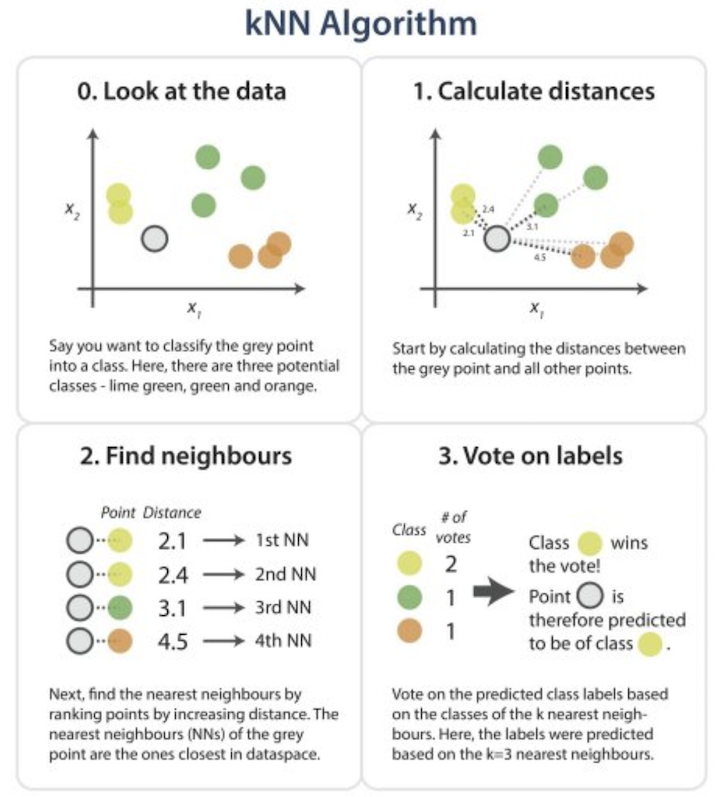
- overall:
    - colors are the different classifications
    - features of the axis
    - so sex can be x1 and survived could be x2
- Image 0:
    - gray is the set point
    - if we set k to one we will be looking at the closest neighbor and only the one closest neighros
        - which would be the bottom yellow dot
    - if we set k to 2 we will be looking at the 2 closest
        - would be the 2 yellow
- Image 1:
    - shows the distance between the grey point and the other data points
    - determineds the closest neighbors
    - if we set k to 2 we will be looking at the 2 closest
        - would be the 2 yellow and bottom green
    - the k can keep going up
- Image 2
    - shows the 4 closest neighbors ranked by distance shortest to largest
    
    
https://www.kdnuggets.com/2016/01/implementing-your-own-knn-using-python.html



### Pros
1. Simple to implement
2. Robust to noisy training data
3. Effective if training data is large
4. Performs calculations "just in time", i.e. when a prediction is needed (as opposed to ahead of time)
5. Training instances can be updated and curated over time to keep predictions accurate.

### Cons
1. Need to determine the value of K
2. The computation cost is high as it needs to compute the distance of each instance to all the training samples...you need to hang on to your entire training dataset.
3. Distance can break down in very high dimensions (not 2-7 dimensioal space we are talking dozens or hundreds of space), negatively affecting the performance. This is know as the "Curse of dimensionality". To alleviate, only use those input variables that are most relevant to predicting the output variable.
    - lots of features/lot of columns
        - think of high dimensions as
            - columns in a data frame
    - avoid k nearest if you have a dozen or hundreds of dimensions

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pydataset import data

df = data('iris')

df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Train Validate Test
Now we'll do our train/validate/test split:
- We'll do exploration and train our model on the `train` data
- We tune our model on `validate`, since it will be out-of-sample until we use it.
- And keep the `test` nice and safe and separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.

In [4]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [5]:
train, validate, test = train_validate_test_split(df, target='species', seed=123)

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

## Train Model
### Create KNN Object

In [6]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

### Fit the model to the training data

In [7]:
knn.fit(X_train, y_train)
# knn default is 5

KNeighborsClassifier()

### Estimate whether or not a passenger would survive, using the training data

In [8]:
y_pred = knn.predict(X_train)

### Estimate the probability of a passenger surviving, using the training data

In [9]:
y_pred_proba = knn.predict_proba(X_train)

## Evaluate Model
### Compute the accuracy

In [10]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.99


### Create a confusion matrix

In [11]:
print(confusion_matrix(y_train, y_pred))

[[28  0  0]
 [ 0 27  1]
 [ 0  0 28]]


### Compute Precision, Recall, F1-score, and Support

In [12]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.96      0.98        28
   virginica       0.97      1.00      0.98        28

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



## Test Model
### Compute the accuracy of the model when run on the test data

In [13]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))
#technically over fit but not by a lot

Accuracy of KNN classifier on test set: 0.97


In [15]:
y_pred = knn.predict(X_validate)

In [17]:
y_pred[0:4]

array(['virginica', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

In [18]:
y_validate.head(4)

135     virginica
63     versicolor
99     versicolor
67     versicolor
Name: species, dtype: object

In [20]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.85      0.92      0.88        12
   virginica       0.91      0.83      0.87        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



## Visualize Model

([<matplotlib.axis.XTick at 0x7fb77002af10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

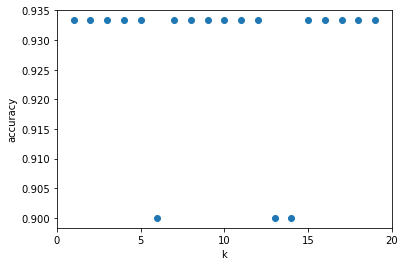

In [14]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## How to determine what K to use for KNN
- start with the default to see if you beat the baseline
- theres not a simple if-this-then-that answer
- the experimental answe is to make a model for a list of different k-values anad compare the metrics for each model

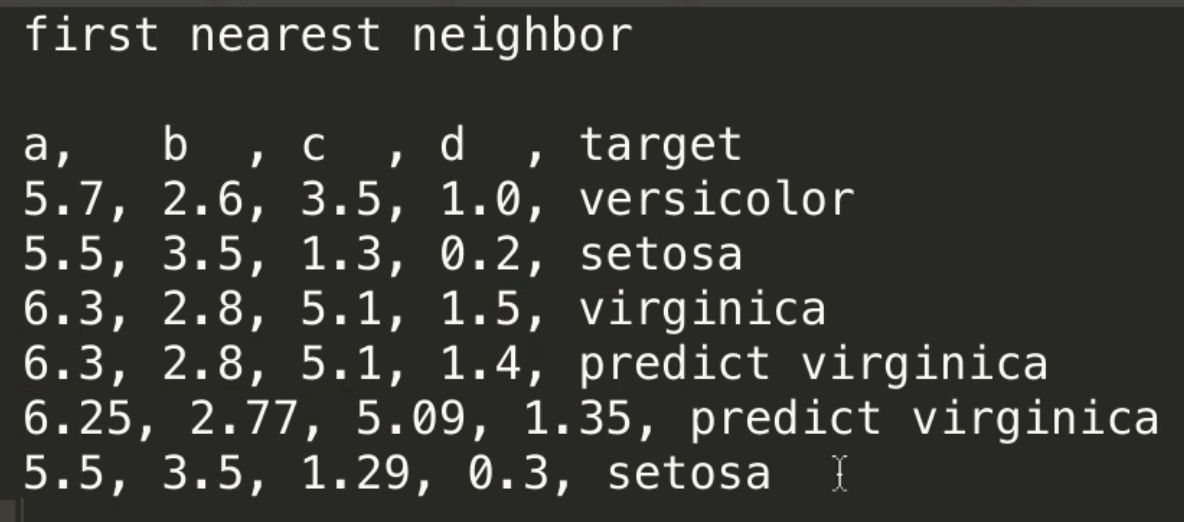image.png


In [22]:
outcomes = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_train, y_train)
    output = {}
    output["k"] = k
    output["accuracy"] = accuracy
    outcomes.append(output)

In [23]:
pd.DataFrame(outcomes)

,k,accuracy
0,1,1.000000
1,2,0.976190
2,3,0.988095
3,4,0.976190
4,5,0.988095
5,6,0.988095
6,7,0.988095
7,8,0.976190
8,9,0.976190


- In this data set it doesnt help but in others it will be
    - you cant have more k than observations in your data frame